# TP3 Arbres de Classification

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, datasets

from tp_arbres_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                              rand_checkers, rand_clown, plot_2d,
                              frontiere)

import seaborn as sns
from matplotlib import rc
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
# text.usetex is set as False by default to avoid problems with student computers
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()

## Exemple !  À supprimer !

(448, 3)


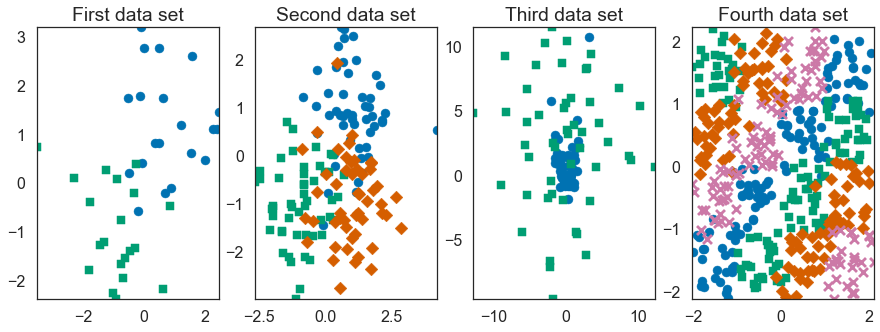

In [18]:
############################################################################
# Data Generation: example
############################################################################

np.random.seed(1)
# ???

n = 100
mu = [1., 1.]
sigma = [1., 1.]
rand_gauss(n, mu, sigma)


n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
data1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
data2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

n1 = 50
n2 = 50
sigma1 = 1.
sigma2 = 5.
data3 = rand_clown(n1, n2, sigma1, sigma2)


n1 = 114  # XXX : change
n2 = 114
n3 = 114
n4 = 114
sigma = 0.1
data4 = rand_checkers(n1, n2, n3, n4, sigma)

############################################################################
# Displaying labeled data
############################################################################

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(data1[:, :2], data1[:, 2], w=None)

plt.subplot(142)
plt.title('Second data set')
plot_2d(data2[:, :2], data2[:, 2], w=None)

plt.subplot(143)
plt.title('Third data set')
plot_2d(data3[:, :2], data3[:, 2], w=None)

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(data4[:, :2], data4[:, 2], w=None)


##### Question 2)

(448, 3)
(448, 2)
[ 0.82432432  0.82432432  0.82432432  0.83108108  0.83108108  0.77702703
  0.63513514  0.56756757  0.35135135  0.25        0.18243243  0.16216216]


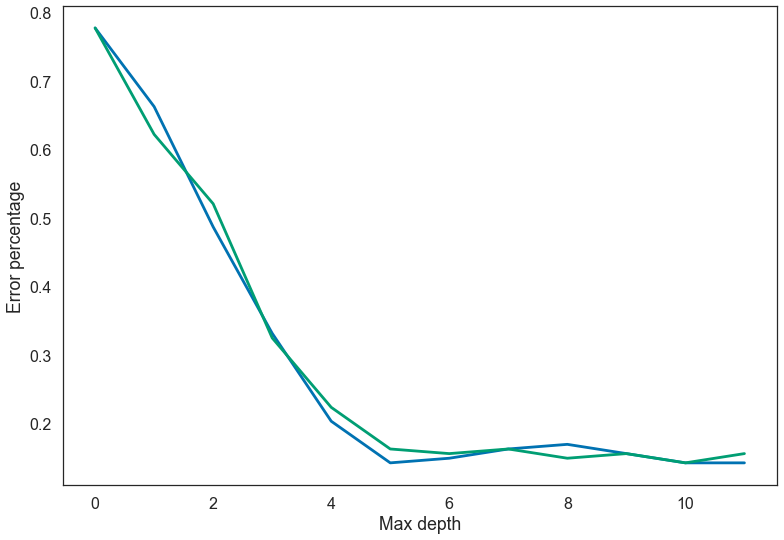

In [27]:
from sklearn.model_selection import train_test_split
############################################
# ARBRES
############################################
# Q2. Créer un objet 'arbre de décision' en spécifiant le critère de
# classification comme l'indice de gini ou l'entropie, avec la
# fonction 'DecisionTreeClassifier' du module 'tree'.

# Effectuer la classification d'un jeu de données simulées
n1 = 112  # XXX : change
n2 = 112
n3 = 112
n4 = 112
sigma = 0.1
data = rand_checkers(n1, n2, n3, n4, sigma)
print(data.shape)

X = data[:, :2]
y = data[:, 2:3]
print(X.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

# Afficher les scores en fonction du paramètre max_depth
dmax = 12
scores_gini = np.zeros(dmax)
scores_entro = np.zeros(dmax)

for i in range(dmax):
    # XXX : TODO
    dt_gini = tree.DecisionTreeClassifier(max_depth=i+1)
    dt_entro= tree.DecisionTreeClassifier(criterion='entropy',max_depth=i+1)
    dt_gini.fit(X_train,y_train)
    dt_entro.fit(X_train,y_train)
    scores_gini[i] = 1 - dt_gini.score(X_test,y_test)
    scores_entro[i]= 1 - dt_entro.score(X_test,y_test)

print(scores)
plt.close(3)
plt.figure(3)
plt.plot(scores_gini)  # TODO
plt.plot(scores_entro)
plt.xlabel('Max depth')
plt.ylabel('Error percentage')
plt.show()
